In [0]:
#Project Case: Boston Housing Data

housing prices derived from the U.S. Census Service
present insights to higher management

what information can you provide Higher Managment to help with making an informed decision?
Upper management will like to get some insight into the following:
    
    1.Is there a significant difference in the median value of houses bounded by the Charles river or not?
    2.Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
    3.Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
    4.What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
    

Using the appropriate:
    graphs,
    charts,
    generate basic statistics,
    visualizations 
    that you think will be useful for the upper management to give them important insight given the question they are asking, 

    In your graphs, include an explanation of each statistic. 











OVERVIEW OF PROJECT TASK

Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.


Task 1: Familiarize yourself with the dataset 
Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.
Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.
Task 4: Generate basic statistics and visualizations for upper management. 
Task 5: Use the appropriate tests to answer the questions provided.
Task 6: Share your Jupyter Notebook.

This project is worth 15% of your final grade. Detailed instructions for each of these tasks follow.



  File <command-2826638283817113>:3
    housing prices derived from the U.S. Census Service
            ^
SyntaxError: invalid syntax


In [0]:
#Task 1 (Familiarize yourself with the dataset)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [0]:
import matplotlib.pyplot as pyplot
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [0]:
#TASK 2: CREATE OR LOGIN INTO IBM CLOUD TO USE WATSON STUDIO (SKIP SKIP SKIP OPTIONAL)

In [0]:
from pyspark.sql.functions import col

In [0]:
#TASK 3: Load in the Dataset in your Jupyter Notebook
df_spark= spark.read.option("escape", "\"").csv("abfss://datascience@gmfcusproddpmlandingsa.dfs.core.windows.net/DS_Orig/Input/Carlos/TEST_practiceData/sampleData.csv", header="true")
for column in df_spark.columns:
    df_spark = df_spark.withColumn(column, col(column).cast('float'))

In [0]:
df_pandas= df_spark.toPandas()
df = df_pandas.copy()
df.shape

Out[4]: (506, 14)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float32
 1   zn       506 non-null    float32
 2   indus    506 non-null    float32
 3   chas     506 non-null    float32
 4   nox      506 non-null    float32
 5   rm       506 non-null    float32
 6   age      506 non-null    float32
 7   dis      506 non-null    float32
 8   rad      506 non-null    float32
 9   tax      506 non-null    float32
 10  ptratio  506 non-null    float32
 11  b        506 non-null    float32
 12  lstat    506 non-null    float32
 13  medv     506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


In [0]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [0]:
df.describe(include = 'all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136780,0.069170,0.554695,6.284634,68.574898,3.795043,9.549407,408.237152,18.455534,356.674042,12.653064,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537109,2.164946,91.294861,7.141061,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [0]:
#TASK 4: Generate Descriptive Statistics and Visualizations

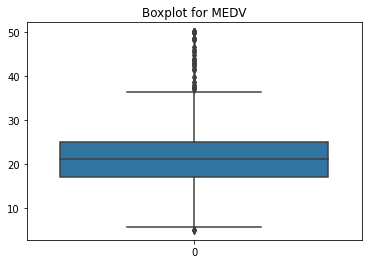

In [0]:
#4.1 For the "Median value of owner-occupied homes" provide a boxplot
#medv
ax = sns.boxplot(data=df.medv)
plt.title("Boxplot for MEDV")
plt.show()
#EXPLANATION, we can see that the median or
#  Q2 is the center line in the blue area,
#  which is around 20.any points outisde 
# the wiskers can possibly be outliers.

Out[10]: Text(0.5, 1.0, 'Chas distribution bar plot')

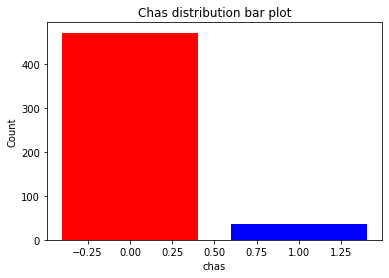

In [0]:
#4.2  Provide a  bar plot for the Charles river variable
pyplot.bar(df.chas.unique(),df.chas.value_counts(),color=['red','blue'])
pyplot.xlabel('chas')
pyplot.ylabel('Count')
pyplot.title('Chas distribution bar plot')

#EXPLANATION, most of the values in the chas variable 
# are smaller than .5 opposed greater than .5 which
# means most of the data is not "Tract bounds river"
#  and more fall into the 0 category for "otherwise."
# 
#  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

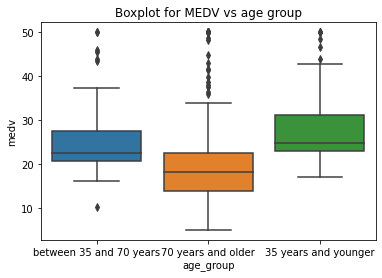

In [0]:
#4.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
df.loc[(df['age'] <= 35), 'age_group'] = '35 years and younger'
df.loc[(df['age'] > 35)&(df['age'] < 70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df['age'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot( x= 'age_group', y ='medv' ,data=df)
plt.title("Boxplot for MEDV vs age group")
plt.show()

#EXPLANATION, we can see the Q2 median by looking at the middle 
# lines in the boxes and see that they are almost all the same
#the dots outside the wiskers could mean outliers and we can
#  see the more prodount in the "between 35-70",
#Also,the middle lines in the boxes are not exaclty 
# in the center which could represent skwness.

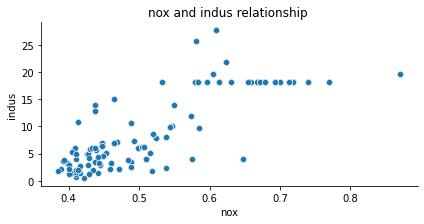

In [0]:
#4.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
#nox indus

sns.relplot(x="nox", y="indus",
            data=df, height = 3, aspect = 2)
plt.title("nox and indus relationship ")
plt.show()
#EXPLANATION, just by looking at the graph
#  it does look like there is a linear
#  relationship between the 2 variables
#since we can see an upward trend.

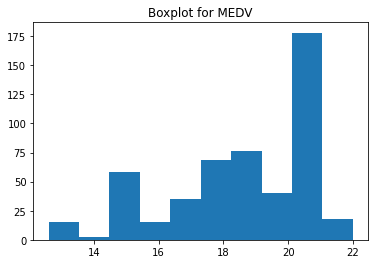

In [0]:
#4.5 Create a histogram for the pupil to teacher ratio variable
pyplot.hist(df['ptratio'])
plt.title("histogram - pupil to teacher ratio variable")
plt.show()
#EXPLANATION:
# we can see that the values range from about 12 to 22
# we can also see that the distribution is right skewed 
#we can also see noticible spikes
#also, maybe even some outliers by the way the right tail looks

In [0]:
# TASK 5:  Use the appropriate tests to answer the questions provided.

In [0]:
#5.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#check equal variances using Levenes test
scipy.stats.levene(df[df['chas'] == 1]['tax'],
                   df[df['chas'] == 0]['tax'], center='mean')

#equal variance 
# because the p value is
#  above .05, therefore 
# we fail to reject the null hypotheses

Out[15]: LeveneResult(statistic=0.4088449773867749, pvalue=0.5228468407943143)

In [0]:
#5.1 continue
scipy.stats.ttest_ind(df[df['chas'] == 1]['tax'],
                   df[df['chas'] == 0]['tax'], equal_var = True)

#EXPLANATION since the p value is .4, we fail to reject
# the null hypothesis and we can infer that there
#  is no difference betweeen the mean value and the charles river

Out[16]: Ttest_indResult(statistic=-0.7994216211624436, pvalue=0.42442256824994085)

In [0]:
#5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#age_group    medv
#check for equal variances using levenes test

scipy.stats.levene(df[df['age_group'] ==  '35 years and younger']['medv'],
                    df[df['age_group'] == 'between 35 and 70 years']['medv'], 
                    df[df['age_group'] == '70 years and older']['medv'], 
                    center='mean')

#EXPLANATION equal variance because the
#  p value is above .05,
#  therefore we fail to reject the null hypotheses

Out[17]: LeveneResult(statistic=2.7806176605722035, pvalue=0.06295352092617253)

In [0]:
#5.2 cont..
lm = ols('medv ~ age_group', data = df).fit()
table= sm.stats.anova_lm(lm) #typ=2
print(table)

#EXPLANATION since the p value is
#  less than .05, we will
#  reject the null hypothesis
#  because there is significant 
# evidence that at least one of the means differ.

              df        sum_sq      mean_sq          F        PR(>F)
age_group    2.0   5401.732014  2700.866007  36.407651  1.710500e-15
Residual   503.0  37314.563592    74.184023        NaN           NaN


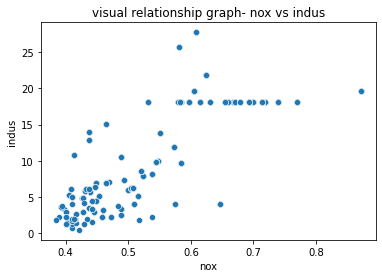

In [0]:
#5.3  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#NOX INDUS

#lets first look at the realtionship graphicaly
ax = sns.scatterplot(x="nox", y="indus", data=df)
plt.title("visual relationship graph- nox vs indus")
plt.show()


In [0]:
#5.3 cont..
scipy.stats.pearsonr(df['nox'], df['indus'])
#EXPLANATION since the p value is smaller 
# than the sig value of 0.05,
#  we will reject the null
#  hypothese and conslude that
#  there exists a relationship between the 2 variables

Out[20]: (0.7636514584146167, 7.913276962407469e-98)

In [0]:
#5.4  What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


X = df['dis']
y = df['medv']



## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#looking at the
#  regression output, 
# we can infer that an additional
#  weight of the variablve DIS
#  increases the MEDV by 1.096

OLS Regression Results 
 
 Dep. Variable: medv R-squared: 0.062 
 
 
 Model: OLS Adj. R-squared: 0.061 
 
 
 Method: Least Squares F-statistic: 33.58 
 
 
 Date: Mon, 13 Nov 2023 Prob (F-statistic): 1.21e-08 
 
 
 Time: 22:18:12 Log-Likelihood: -1823.9 
 
 
 No. Observations: 506 AIC: 3652. 
 
 
 Df Residuals: 504 BIC: 3660. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 18.3901 0.817 22.499 0.000 16.784 19.996 
 
 
 dis 1.0916 0.188 5.795 0.000 0.722 1.462 
 
 
 
 
 Omnibus: 139.779 Durbin-Watson: 0.570 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 305.104 
 
 
 Skew: 1.466 Prob(JB): 5.59e-67 
 
 
 Kurtosis: 5.424 Cond. No. 9.32 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.